In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('nyc.csv.zip', compression='zip')

In [3]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


# Dataset description

`pickup_datetime` — дата начала поездки

`pickup_longitude` — долгота исходного местоположения

`pickup_latitude` — широта исходного местоположения

`dropoff_longitude` — долгота пункта назначения

`dropoff_latitude` — широта пункта назначения

`fare_amount` — стоимость поездки в долларах 

`passenger_count` — число пассажиров

# Task

Представьте, что вы аналитик в сервисе такси. Вам дали следующие задачи:

1. Написать функцию `haversine` для подсчета расстояния между пунктами отправления и прибытия для каждой поездки. Подсчитанное расстояние записать в новую колонку `distance`.


2. Найдите самую длинную поездку.


__Формула для подсчета расстояния:__

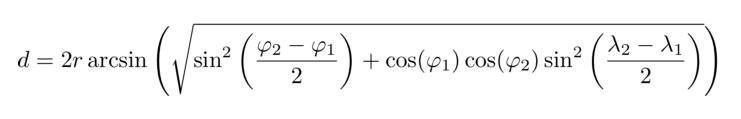

- __φ1__ и __ф2__ — широта исходного местоположения и широта пункта назначения в радианах,


- __λ1__ и __λ2__ — долгота исходного местоположения и долгота пункта назначения в радианах,


- __r__ — радиус сферы, будем считать его равным 6371

# 1. Найти расстояние

**Проверим данные**

In [4]:
df.shape

(50000, 8)

In [5]:
df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


**Напишем функцию для подсчета расстояния**

In [7]:
def haversine(p_long, p_lat, d_long, d_lat, radius=6371):
    p_long, d_long, p_lat, d_lat = map(np.radians, [p_long, d_long, p_lat, d_lat])
    diff_long = d_long - p_long
    diff_lat = d_lat - p_lat
    
    a = np.sin(diff_lat/2.0)**2 + np.cos(p_lat) * np.cos(d_lat) * np.sin(diff_long/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    d = radius * c
    
    return d

**Найдем расстояние**

Воспользуемся векторизацией NumPy array для наибольшей скорости подсчета

In [8]:
df['distance'] = haversine(df.pickup_longitude.values, df.pickup_latitude.values, \
                           df.dropoff_longitude.values, df.dropoff_latitude.values)

In [9]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


# 2. Найти самую длинную поездку

In [10]:
df.distance.max()

8667.818812217454

Максимальная дистанция в 8667 км является крайне странной для поездки на такси. Изучим данные подробнее.

In [11]:
df.sort_values('distance', ascending=False).head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
48996,2012-05-12 10:48:00.00000020,49.8,2012-05-12 10:48:00 UTC,-74.014917,40.713382,0.000000,0.000000,1,8667.818812
31823,2013-11-26 18:12:00.000000179,52.0,2013-11-26 18:12:00 UTC,-74.005490,40.739532,0.000000,0.000000,1,8667.572331
9147,2014-07-14 21:37:29.0000002,8.5,2014-07-14 21:37:29 UTC,0.000000,0.000000,-74.002037,40.752035,1,8667.542104
37798,2013-08-28 12:11:00.00000087,22.5,2013-08-28 12:11:00 UTC,-74.004465,40.741823,0.000000,0.000000,1,8667.534293
8647,2014-03-27 18:01:00.00000071,21.5,2014-03-27 18:01:00 UTC,-74.001808,40.750782,0.000000,0.000000,1,8667.497512


In [12]:
df.query('dropoff_longitude == 0 | dropoff_latitude == 0').shape

(958, 9)

Очевидно, что в данных есть ошибки, а именно нулевые значения широты и долготы. Поэтому нам нужно отфильтровать их, чтобы найти самую длинную поездку.

Посмотрим на визуальное распределение колонок `pickup_longitude`, `pickup_latitude`, `dropoff_longitude`, `dropoff_latitude`, чтобы найти критерии фильтрации.

<AxesSubplot:xlabel='pickup_longitude', ylabel='Density'>

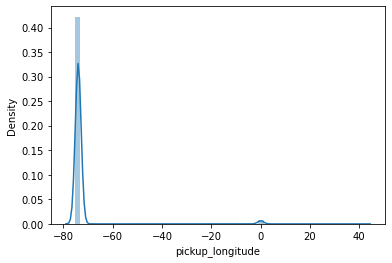

In [13]:
sns.distplot(df.pickup_longitude)

<AxesSubplot:xlabel='pickup_latitude', ylabel='Density'>

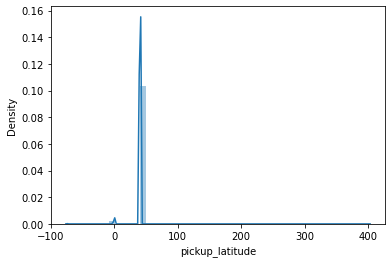

In [14]:
sns.distplot(df.pickup_latitude)

<AxesSubplot:xlabel='dropoff_longitude', ylabel='Density'>

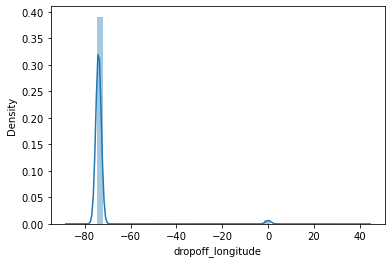

In [15]:
sns.distplot(df.dropoff_longitude)

<AxesSubplot:xlabel='dropoff_latitude', ylabel='Density'>

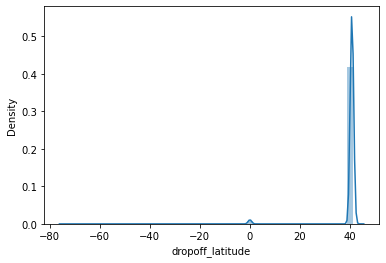

In [16]:
sns.distplot(df.dropoff_latitude)

**Фильтрация данных**

Критерии фильтрации:

1. `pickup_longitude` < -60


2. 10 < `pickup_latitude` < 120


3. `dropoff_longitude` < -60


4. 10 < `opoff_latitude`

In [17]:
df_filtred = df.query('pickup_latitude < 120 & pickup_latitude > 10 & pickup_longitude < -60 & dropoff_latitude > 10 & dropoff_longitude < -60')

# Количество убранных данных
df.shape[0] - df_filtred.shape[0]

1029

**Самая длинная поездка**

In [18]:
df_filtred.sort_values('distance', ascending=False).head(1)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
45139,2015-06-04 14:24:03.0000005,57.54,2015-06-04 14:24:03 UTC,-70.140793,38.754215,-73.78978,40.646969,1,376.445536
